# Random fields via SPDE

This example implements the following stochastic PDE (SPDE):

$$(\kappa^2 - \Delta)^{\alpha/2} u = \mathcal{W}$$

where $\kappa>0$ is inversely proportional to *correlation length*, $\alpha=\nu+d/2$ is a *smoothness* parameter and $\mathcal{W}$ is white noise. We set $\alpha/2 = N\in\mathbb{N}$, corresponding to $\nu=2N-d/2$.

Given $N$, the SPDE is iteratively solved as follows:

$$\begin{cases}
u_0 = \mathcal{W}, & \\
(\kappa^2 - \Delta) u_k = u_{k-1}, & k=1,\ldots,N \\
\end{cases}$$

The solution $u(x,\omega)$ behaves as a random field with zero mean and covariance function $r(x,y)=h(\|x-y\|)$ of the form:

$$h(d) \sim (\kappa d)^\nu \, K_\nu(\kappa d)$$

where $K_\nu$ is the Bessel function on 2nd kind and order $\nu>0$. See [Lindgren *et al.* (2001)](https://doi.org/10.1111/j.1467-9868.2011.00777.x). We remark that at the boundary of domain the solution deviates from this theory.

In our implementation, we assume:

$$\kappa = \frac{2\sqrt(\nu)}{\rho}$$

for some $\rho>0$ (the correlation length.) In particular, for $\nu\to\infty$, the correlation tends to a squared-exponential:

$$h(d) = e^{-d^2/\rho^2}.$$

## Implementation

We solve the SPDE with FEniCS. A wrapper around the solver is implemented in the class `RandomFieldSPDE`.

In [1]:
from sampler import RandomFieldSPDE
from fenics import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We solve on a $100\times100$  square with linear FE. (The solver deduces the dimension of the problem from the mesh.)

In [2]:
mesh = UnitSquareMesh(100,100)
fe = FiniteElement("P",mesh.ufl_cell(),1)
V = FunctionSpace(mesh,fe)

We initialize the random field sampler with correlation $\rho = 0.05$ and $N=1$ or, equivalently, $\nu = 1$.

In [3]:
sampler = RandomFieldSPDE(V,N=1,rho=0.05)

We draw 9 samples using the generator `RandomFieldSPDE.sample`.

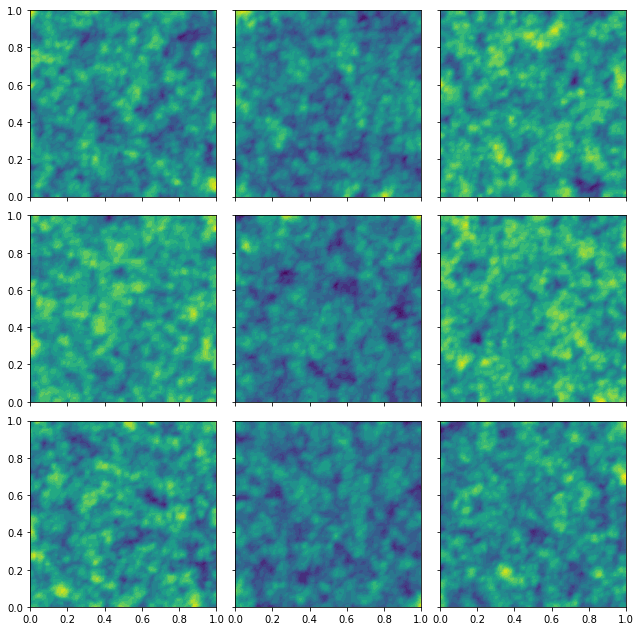

In [4]:
fig,axs = plt.subplots(3,3,sharex=True,sharey=True,figsize=(9,9))
for sample,ax in zip(sampler.sample(9),axs.ravel()):
    ax.title.set_visible(False)
    plt.sca(ax)
    plot(sample,levels=20)
fig.tight_layout(h_pad=0,w_pad=0)

Estimated standard deviation (from 1000 samples) clearly shows boundary effects.

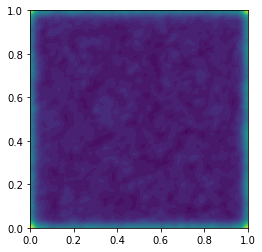

In [5]:
u_std = Function(V,name="stddev")
u_std.vector().set_local( np.array([s.vector().get_local() for s in sampler.sample(1000)]).std(axis=0) )
plot(u_std)

In [6]:
u_std.vector().get_local().min(), u_std.vector().get_local().max()

(0.8784201907339176, 1.9973002573222451)

### Effect of correlation length and smoothness parameter.

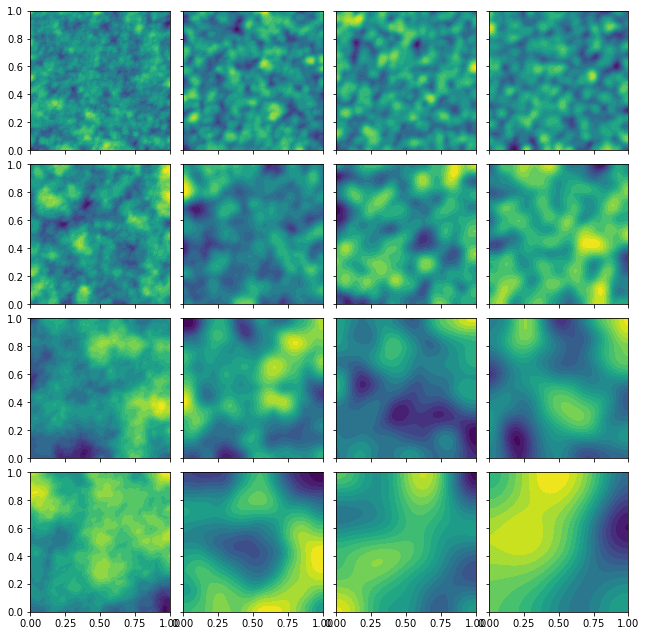

In [8]:
from itertools import product
fig,axs = plt.subplots(4,4,sharex=True,sharey=True,figsize=(9,9))
RR = 2**np.arange(4)*0.05
NN = 2**np.arange(4)
for (rho,N),ax in zip(product(RR,NN),axs.ravel()):
    sampler = RandomFieldSPDE(V,N=N,rho=rho)
    s = next(sampler.sample(1))
    ax.title.set_visible(False)
    plt.sca(ax)
    plot(s,levels=20)
fig.tight_layout(h_pad=0,w_pad=0)